# install dependencies

In [1]:
!pip3 install inverse-canopy==0.0.21

# **Model Inputs**

In [2]:
from inverse_canopy import InverseCanopy
import tensorflow as tf
import numpy as np

tunable initialized: dtype=<dtype: 'float64'>, epsilon=1e-20
learning_rate: 0.1,patience: 50,min_improvement: 0.001,max_steps: 5000,seed: 372
Step 0: Loss = 8.4949109109772980, performing 80.3 it/sec
Step 100: Loss = 0.6579764878613327, performing 256.0 it/sec
Step 200: Loss = 0.3775669669177212, performing 253.6 it/sec
Step 300: Loss = 0.1768993158028637, performing 230.6 it/sec
Step 400: Loss = 0.0089598148477601, performing 333.4 it/sec
No improvement since Step 420, early stopping.
[Best]  Step 419: Loss = 0.0044997366499839
[Final] Step 469: Loss = 0.0058710415204631

predicted end states
------------------------------------
         5th       Mean      95th
LONP-1  9.82e-02  9.82e-02  9.82e-02
LONP-2  8.22e-10  8.37e-10  8.55e-10
LONP-3  1.76e-03  1.76e-03  1.76e-03
LONP-4  1.47e-11  1.49e-11  1.52e-11
LONP-5  5.76e-11  5.79e-11  5.81e-11
LONP-6  2.01e-08  2.01e-08  2.01e-08


predicted conditional events
----------------------------------------
             5th       Mean      9

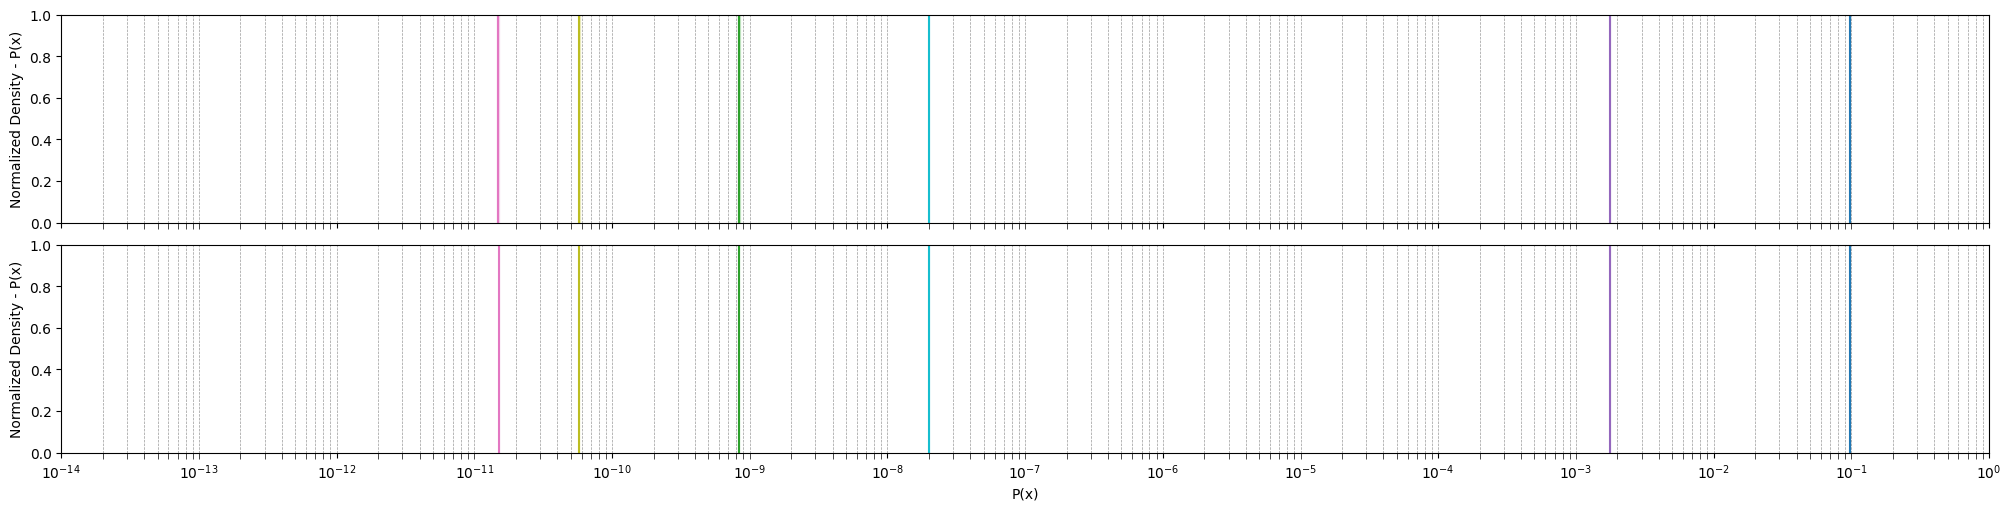

In [4]:
tunable = {
 'num_samples': 100,      # number of monte carlo samples
 'learning_rate': 0.1,    # the gradient update rate
 'dtype': tf.float64,     # use 64-bit floats
 'epsilon': 1e-20,        # useful for avoiding log(0 + epsilon) type errors
 'max_steps': 5000,       # maximum steps, regardless of convergence
 'patience': 50,          # number of steps to wait before early stopping if the loss does not improve
 'initiating_event_frequency': 1e-1,  # set the initiating event (IE) frequency here
 'freeze_initiating_event': True,       # set to False if you'd like to predict the IE frequency as well
}

conditional_events = {
    'names': ['LONP', 'LROD', 'BPHR','DHRS','DHRL|BPHR', 'DHRL|~BPHR'],
    'bounds': {
        'mean': {
            'min': 1e-14,
            'max': 1.00,
        },
        'std': {
            'min': 1e-10,
            'max': 1e8,
        },
     },
    'initial': {
       'mean': 5e-1,
       'std': 1e8,
    }
}

end_states = {

    'LONP-1': {
        'sequence': [1, 0, 0, np.nan, np.nan, 0],
        'probability': 9.82e-2,
    },
    'LONP-2': {
        'sequence': [1, 0, 0, np.nan, np.nan, 1],
        'probability': 8.4e-10,
    },
    'LONP-3': {
        'sequence': [1, 0, 1, 0, 0, np.nan],
        'probability': 1.76e-3,
      },
    'LONP-4': {
        'sequence': [1, 0, 1, 0, 1, np.nan],
        'probability': 1.5e-11,
      },
    'LONP-5': {
        'sequence': [1, 0, 1, 1, np.nan, np.nan],
        'probability': 5.8e-11,
      },
    'LONP-6': {
        'sequence': [1, 1, np.nan, np.nan, np.nan, np.nan],
        'probability': 2e-8,
      },

}

model = InverseCanopy(conditional_events, end_states, tunable)
model.fit(steps=tunable['max_steps'], patience=tunable['patience'], learning_rate=tunable['learning_rate'])
model.summarize(show_plot=True, show_metrics=False)